# Tutorial 2 Solution
## kNN Classification

## Loading Iris data
Iris data set consists of 150 samples having three classes namely Iris-Setosa, Iris-Versicolor, and Iris-Virginica. Four features/ attributes contribute to uniquely identifying as one of the three classes are <b>sepal-length, sepal-width, petal-length </b> and <b>petal-width</b>.

Sklearn is a machine learning python library that is widely used for data-science related tasks. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means, KNN, etc. By using sklearn library, we can access several datasets that can be used for different tasks including the Iris dataset.

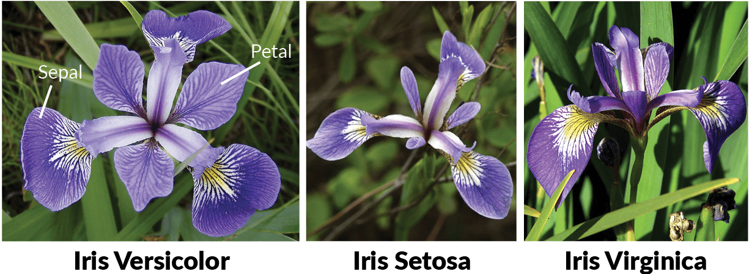

In [1]:
from IPython.display import Image
Image(filename =r'IrisImage.png')

In [2]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Preprocessing iris data
After having loaded the data and analyzed it extensively, it is time to prepare the data which we can then feed to our ML model. We can preprocess the data in two ways: 
(i)  Normalizing your data and 
(ii) Splitting your data into training and testing sets

### Normalizing your data
There can be two ways by which you can normalize your data. Now the question is why or when do you need to normalize your data? And do you need to standardize the Iris data?

It is a good practice to normalize your data as it brings all the samples in the same scale and range. Normalizing the data is crucial when the data you have is not consistent. We can check for inconsistency by using the describe() function that you studied above which will give usmax and min values. If the max and min values of one feature are significantly larger than the other feature then normalizing both the features to the same scale is very important.

Let's say X is one feature having a larger range and Y being the second feature with a smaller range. Then, the influence of feature Y can be overpowered by feature X's influence. In such a case, it becomes important to normalize both the features X and Y.

In Iris data, normalization is not required. Let's print the describe() function again and see why you do not need any normalization.

## Load the dataset

In [3]:
import pandas as pd

# Load the iris dataset
df = pd.read_csv("iris.csv")
# Display first five records
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Replace categorical data "Iris-setosa", "Iris-Versicolor" and "Iris-Virginica" with 0, 1 and 2
df['Species'].replace('Iris-setosa', 0, inplace = True)
df['Species'].replace('Iris-versicolor', 1, inplace = True)
df['Species'].replace('Iris-virginica', 2, inplace = True)

In [5]:
# Display first five records
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Describe the summary of the dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


The sepal-length attribute has values that go from 4.3 to 7.9 and sepal-width contains values from 2 to 4.4, while petal-length values range from 1 to 6.9 and petal-width ranges from 0.1 to 2.5. The values of all the features are within the range of 0.1 and 7.9, which can consider as acceptable. Hence, we do not need to apply any normalization to the Iris dataset.

## Splitting the data
This is another significant aspect of machine learning since your goal is to make a model capable enough to be able to take decisions or classify data in a test environment without any human intervention. Hence, before deploying your ML model in the industry, we need to make sure that the model can generalize well on the testing data.

For this purpose, we need a training and testing set. Coming back to the Iris data, we have 150 samples, we will be training your ML model on 80% of the data and the remaining 20% of the data will be used for testing.

In data-science, we come across a term called Overfitting which means that your model has learned the training data very well but fails to perform on the testing data. So, splitting the data into training and testing or validation set help us to know whether our model is overfitting or not.

For training and testing set split, we use the sklearn library which has an in-built splitting function called train_test_split. So, let's split the data.

In [7]:
# Store first two columns (Sepal length and Sepal width) in an array X 
X = df.iloc[:,:2]

# Store the target variable as lable into an array y
y = df.iloc[:,4]

# Display number of rows and columns
X.shape, y.shape

((150, 2), (150,))

In [8]:
print(X, y)

     SepalLengthCm  SepalWidthCm
0              5.1           3.5
1              4.9           3.0
2              4.7           3.2
3              4.6           3.1
4              5.0           3.6
..             ...           ...
145            6.7           3.0
146            6.3           2.5
147            6.5           3.0
148            6.2           3.4
149            5.9           3.0

[150 rows x 2 columns] 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

# 0.2 means 20% for testing and random_state simply sets a seed to the random generator, so that your train-test splits
# are always deterministic. If we don't set a seed, it is different each time.

In [10]:
# Print the shape of training and testing data along with its labels.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

# The KNN Model
After loading, analyzing and preprocessing of the data, it is now time when we feed the data into the KNN model. To do this, we  use sklearn's inbuilt function neighbors which has a class called KNeigborsClassifier in it. Let's start by importing the classifier.

## Generating Model for k = 3
Let's build KNN classifier model for k = 3.

In [11]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 3)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)

## Model Evaluation for k = 3
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [12]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.77


### Confusion Matrix
A confusion matrix is mainly used to describe the performance of ML model on the test data for which the true values or labels are known. Scikit-learn provides a function that calculates the confusion matrix for you.

<AxesSubplot:>

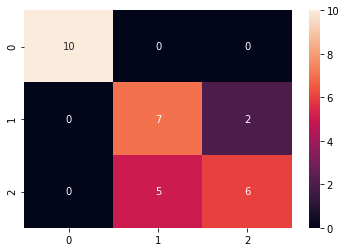

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Call a method predict by using an object classifier 'cls_svm'
y_predict = kNN.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

### Classification Report
Classification report helps us in identifying the misclassified classes in much more detail by giving precision, recall and F1 score for each class. We use the sklearn library to visualize the classification report.

In [14]:
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.58      0.78      0.67         9
           2       0.75      0.55      0.63        11

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.77        30
weighted avg       0.78      0.77      0.76        30



## Hyperparameters
In order to decide the best value for hyperparameter k (number of neighbors), We need to train and test your model on 10 different k values and finally use the one that gives the best results.

Let's initialize a variable neighbors(k) which will have values ranging from 1-9 and two numpy zero matrices namely train_accuracy and test_accuracy each for training and testing accuracy. We need them later to plot a graph to choose the best neighbor value.

In [15]:
import numpy as np
neighbors = np.arange(1, 11)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))      # Declare and initialise the matrix

The following piece of code is where all the magic will happen. We enumerate over all the nine neighbor values and for each neighbor we then predict both on training and testing data. Finally, store the accuracy in the train_accuracy and test_accuracy numpy arrays.

In [16]:
for i, k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 10
    kNN = KNeighborsClassifier(n_neighbors = k)            # Initialise an object knn using KNeighborsClassifier method

    # Fit the model
    kNN.fit(X_train, y_train)                              # Call fit method to implement the ML KNeighborsClassifier model

    # Compute accuracy on the training set
    train_accuracy[i] = kNN.score(X_train, y_train)        # Save the score value in the train_accuracy array

    # Compute accuracy on the test set
    test_accuracy[i] = kNN.score(X_test, y_test)           # Save the score value in the train_accuracy array

We plot the training and testing accuracy using matplotlib, with accuracy vs. varying number of neighbors graph. Now we can choose the best k value at which our model performs the best.

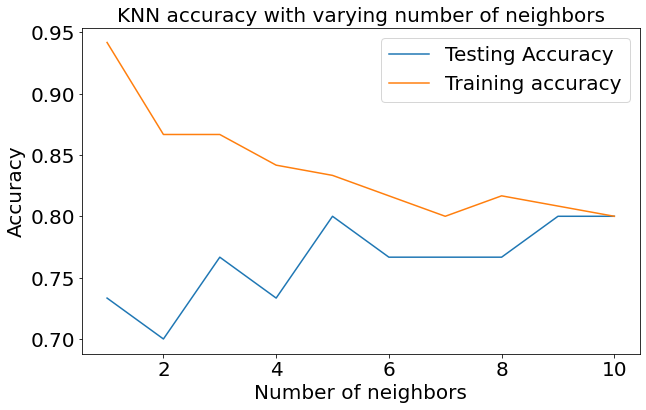

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# kNN for Regression

In [18]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


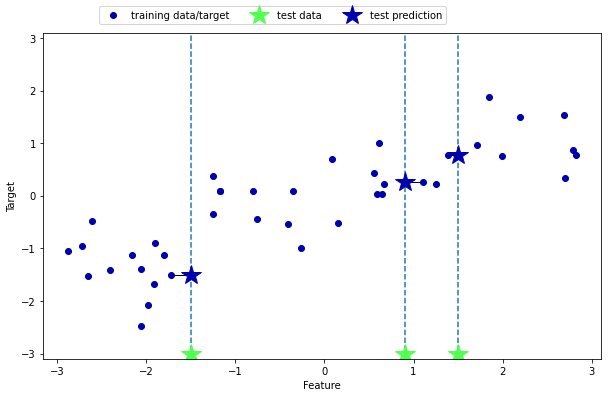

In [19]:
# import the libraries
import mglearn 
import matplotlib.pyplot as plt

# plot k-neighbors regression with n_neighbors = 1
mglearn.plots.plot_knn_regression(n_neighbors = 1)

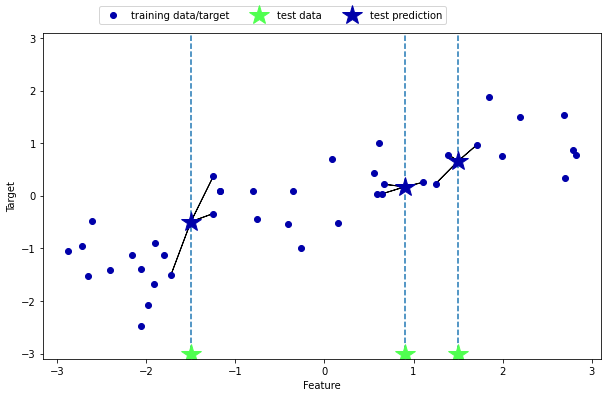

In [20]:
# plot k-neighbors regression with n_neighbors = 3
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# Generate the data using make_wave() function
X, y = mglearn.datasets.make_wave(n_samples = 40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors = 3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
# Predict the results for X_test
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
# Calculate the R^2 score
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


# Analyzing KNeighbours Regressor

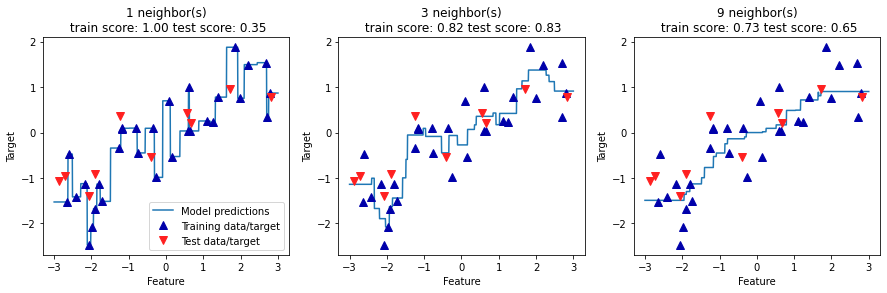

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,    
              reg.score(X_train, y_train),reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

# Task 1
Apply kNN on the provided dataset on Moodle named as 'data_cancer.csv'. The dataset has 568 rows and 31 columns. Use only two columns for kNN named as <b> 'mean area', 'mean compactness' </b> and the target variable named as <b>'diagnosis'</b>. Split the dataset into two parts, such as feature columns and target variable. You need to explore the data set and then apply kNN machine learning model to predict the cancer. Use three splittings, such as 10%, 30% and 40%. 

In [25]:
import numpy as np
import pandas as pd

In [26]:
# Load breast cancer dataset from the Moodle
data_cancer = pd.read_csv('data_cancer.csv')

# Display the first 5 records
data_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [27]:
# Display the information of dataframe named as 'data_cancer'
data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [28]:
# Make the two columns named as 'X' and 'y'.
X = data_cancer[['mean_area', 'mean_compactness']]
y = data_cancer[['diagnosis']]

In [29]:
# Place the DataFrames side by side
data_cancer1 = pd.concat([X, y], axis = 1)

# Display the 5 rows for the modified dataframe.
data_cancer1.head()

,mean_area,mean_compactness,diagnosis
0,1001.0,0.27760,0
1,1326.0,0.07864,0
2,1203.0,0.15990,0
3,386.1,0.28390,0
4,1297.0,0.13280,0


In [30]:
# Display the number of rows and columns of the dataframe.
data_cancer1.shape

(569, 3)

In [31]:
# Check the presence of the null values inthe dataframe.
data_cancer1.isnull().sum()

mean_area           0
mean_compactness    0
diagnosis           0
dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

# Call the method train_test_split() to splot the data based on the specific split
# We use a specific split test_size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Create and initialise an object knn by calling a method called as 'KNeighborsClassifier'.
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

# Call the fit() method to train the model based on the trainig data
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [34]:
# Predict the alues based on the testing data
y_pred = knn.predict(X_test)

# Task 2:
Display the scatter plot for the diagnosis as [0, 1] for the two columns, <b>mean_area</b> and <b>mean_compactness</b>.

<AxesSubplot:xlabel='mean_area', ylabel='mean_compactness'>

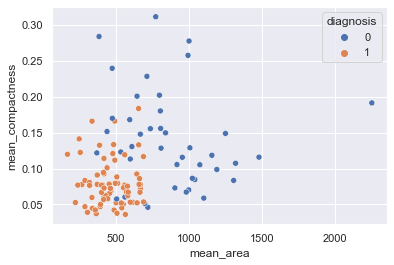

In [35]:
import seaborn as sns
sns.set()

sns.scatterplot(
    x = 'mean_area',
    y = 'mean_compactness',
    hue = 'diagnosis',
    data = X_test.join(y_test, how = 'outer')
)

<AxesSubplot:>

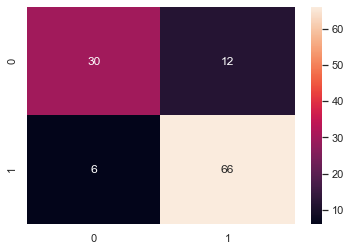

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Call a method predict by using an object classifier 'cls_svm'
y_predict = knn.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

## Reference: 
* https://www.datacamp.com/community/tutorials/introduction-machine-learning-python
* https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55